In [6]:
!pip install networkx

    100% |████████████████████████████████| 1.6MB 559kB/s 
  Running setup.py bdist_wheel for networkx ... - \ | / - \ | / - \ | / - done
  Stored in directory: /home/notebook/.cache/pip/wheels/a0/33/4e/7c9228ea77f8090e895d8d2b76f3b5a76997a5b3edeb4e2c6f
Successfully built networkx
  Found existing installation: decorator 4.0.10
    Not uninstalling decorator at /usr/local/lib/python3.5/dist-packages, outside environment /resources/common/.virtualenv/python3


In [490]:
import numpy as np
import pylab as plt
import random
import matplotlib.pyplot as pyplot

# Needed to show plots inline for notebooks
%matplotlib inline

In [491]:
#Source:
#http://amunategui.github.io/reinforcement-learning/

# map cell to cell, add circular cell to goal point
#points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]
#points_list = [(0,4), (1,3), (1,5), (2,3), (3,1), (3,2), (3,4), (4,0), (4,3), (4,5), (5,1), (5,4), (5,5)]
points_list = [(0,4), (1,3), (1,5), (2,3), (3,1), (3,2), (3,4), (4,0), (4,3), (4,6), (5,1),(5,6), (6,4),(6,5), (6,6)]

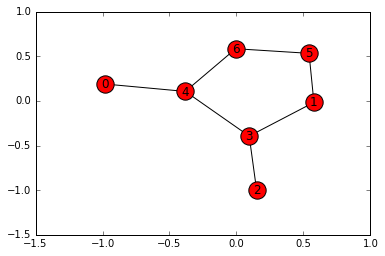

In [495]:
goal = 6

import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [496]:
# how many points in graph? x points
MATRIX_SIZE = 7

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

In [497]:
# assign zeros to paths and 100 to goal-reaching point
goalReward = 100
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = goalReward
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = goalReward
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= goalReward

R

(0, 4)
(1, 3)
(1, 5)
(2, 3)
(3, 1)
(3, 2)
(3, 4)
(4, 0)
(4, 3)
(4, 6)
(5, 1)
(5, 6)
(6, 4)
(6, 5)
(6, 6)


matrix([[  -1.,   -1.,   -1.,   -1.,    0.,   -1.,   -1.],
        [  -1.,   -1.,   -1.,    0.,   -1.,    0.,   -1.],
        [  -1.,   -1.,   -1.,    0.,   -1.,   -1.,   -1.],
        [  -1.,    0.,    0.,   -1.,    0.,   -1.,   -1.],
        [   0.,   -1.,   -1.,    0.,   -1.,   -1.,  100.],
        [  -1.,    0.,   -1.,   -1.,   -1.,   -1.,  100.],
        [  -1.,   -1.,   -1.,   -1.,    0.,    0.,  100.]])

In [502]:
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

def sample_next_action(available_actions_range):
    
    next_action = int(np.random.choice(available_act,1))
    return next_action

def choose_action(available_actions_range, state):

    if random.random() < epsilon: 
        # exploration 
        action = random.choice(available_actions_range) 
        return action
    else: 
        q = [Q.item(state, a) for a in available_actions_range]
        maxQ = max(q)
        count = q.count(maxQ) 
        if count > 1:
            best = [i for i in range(len(available_actions_range)) if q[i] == maxQ]
            i = random.choice(best)
        else:
            i = q.index(maxQ)
 
        action = available_actions_range[i]
        return action

def update(current_state, action, gamma):
    
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]
  
  #Q[current_state, action] = R[current_state, action] + gamma * max_value
  Q[current_state, action] = (1-alpha)*Q[current_state, action] + alpha*(R[current_state, action] + gamma * max_value)
  #print('max_value', R[current_state, action] + gamma * max_value)
  
  if (np.max(Q) > 0):
    return np.round(np.sum(Q/np.max(Q)*100))
  else:
    return (0)

Convergence:
229
Trained Q matrix:
[[   0.     0.     0.     0.    10.     0.     0. ]
 [   0.     0.     0.     1.     0.    10.     0. ]
 [   0.     0.     0.     1.     0.     0.     0. ]
 [   0.     1.     0.1    0.    10.     0.     0. ]
 [   1.     0.     0.     1.     0.     0.   100. ]
 [   0.     1.     0.     0.     0.     0.   100. ]
 [   0.     0.     0.     0.    10.    10.   100. ]]
Most efficient path:
[2, 3, 4, 6]


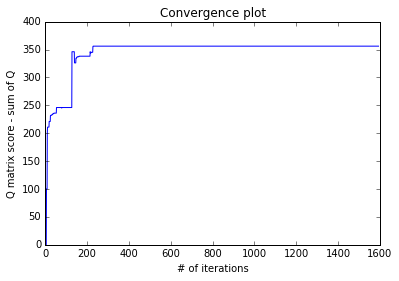

In [504]:
# Training & testing
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
alpha = 1
gamma = 0.1
epsilon =0.9
reduceEpsilonIteration = 100
reduceEpsilonDelta = 0.1

initial_state = 1

available_act = available_actions(initial_state) 

action = choose_action(available_act, initial_state)

update(initial_state, action, gamma)

# Training
scores = []

for i in range(300):
    if((i > 0) & (i%reduceEpsilonIteration == 0)):
       epsilon = epsilon - reduceEpsilonDelta
       if(epsilon < 0):
           epsilon = 0
    
    current_state = np.random.randint(0, int(Q.shape[0]))
    while True:
        
        available_act = available_actions(current_state)
        action = choose_action(available_act, current_state)
        score = update(current_state,action,gamma)
        scores.append(score)
        current_state = action
        if current_state == goal:
            break
        #print ('Score:', str(score))

print ("Convergence:")
print (scores.index(scores[-1]))

print("Trained Q matrix:")
print (np.round(Q/np.max(Q)*100,2))


# Testing
current_state = 2
steps = [current_state]

while current_state != goal:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.ylabel('Q matrix score - sum of Q')
plt.xlabel('# of iterations')
plt.title('Convergence plot')
plt.show()

In [507]:
# Hyper parameter tuning - epsilon

epsilonList = [0, 0.1, 0.2, 0.3,0.5, 0.7, 0.9]
iterations = []
successRate = []

loop = 50
for e in epsilonList:
    iterationsTmp = []
    successCount = 0
    for n in range(loop):

        Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

        # learning parameter
        alpha = 1
        gamma = 0.1
        epsilon = e
        reduceEpsilonIteration = 25
        reduceEpsilonDelta = 0.1

        initial_state = 1

        available_act = available_actions(initial_state) 

        action = choose_action(available_act, initial_state)

        update(initial_state, action, gamma)

        # Training
        scores = []

        for i in range(500):
            if((i > 0) & (i%reduceEpsilonIteration == 0)):
               epsilon = epsilon - reduceEpsilonDelta
               if(epsilon < 0):
                   epsilon = 0

            current_state = np.random.randint(0, int(Q.shape[0]))
            while True:

                available_act = available_actions(current_state)
                action = choose_action(available_act, current_state)
                score = update(current_state,action,gamma)
                scores.append(score)
                current_state = action
                if current_state == goal:
                    break
        iterationsTmp.append(scores.index(scores[-1]))
        
        # Testing
        current_state = 2
        steps = [current_state]

        while current_state != goal:

            next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]

            if next_step_index.shape[0] > 1:
                next_step_index = int(np.random.choice(next_step_index, size = 1))
            else:
                next_step_index = int(next_step_index)

            steps.append(next_step_index)
            current_state = next_step_index

        if(len(steps) == 4):
            successCount = successCount + 1

        
    iterations.append(sum(iterationsTmp)/len(iterationsTmp))
    successRate.append(successCount/loop)


In [508]:
fig, ax1 = plt.subplots()
color = 'red'
ax1.set_xlabel('Epsilon - exploration rate')
ax1.set_ylabel('Success Rate', color=color)
ax1.plot(epsilonList, successRate, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.ylim([0.6,1.05])
ax2 = ax1.twinx()

color = 'blue'
ax2.set_ylabel('Covergence - # iterations', color=color)  
ax2.plot(epsilonList, iterations, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Exploration Rate (epsilon) Tuning')
plt.show()

In [509]:
# Hyper parameter tuning - gamma

gammaList = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8]
iterations = []
successRate = []

loop = 50
for g in gammaList:
    iterationsTmp = []
    successCount = 0
    for n in range(loop):

        Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

        # learning parameter
        alpha = 1
        gamma = g
        epsilon = 0.9
        reduceEpsilonIteration = 25
        reduceEpsilonDelta = 0.1

        initial_state = 1

        available_act = available_actions(initial_state) 

        action = choose_action(available_act, initial_state)

        update(initial_state, action, gamma)

        # Training
        scores = []

        for i in range(500):
            if((i > 0) & (i%reduceEpsilonIteration == 0)):
               epsilon = epsilon - reduceEpsilonDelta
               if(epsilon < 0):
                   epsilon = 0

            current_state = np.random.randint(0, int(Q.shape[0]))
            while True:

                available_act = available_actions(current_state)
                action = choose_action(available_act, current_state)
                score = update(current_state,action,gamma)
                scores.append(score)
                current_state = action
                if current_state == goal:
                    break
        iterationsTmp.append(scores.index(scores[-1]))
        
        # Testing
        current_state = 2
        steps = [current_state]

        while current_state != goal:

            next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]

            if next_step_index.shape[0] > 1:
                next_step_index = int(np.random.choice(next_step_index, size = 1))
            else:
                next_step_index = int(next_step_index)

            steps.append(next_step_index)
            current_state = next_step_index

        if(len(steps) == 4):
            successCount = successCount + 1

        
    iterations.append(sum(iterationsTmp)/len(iterationsTmp))
    successRate.append(successCount/loop)


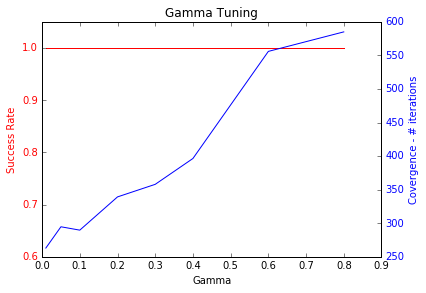

In [510]:
fig, ax1 = plt.subplots()
color = 'red'
ax1.set_xlabel('Gamma')
ax1.set_ylabel('Success Rate', color=color)
ax1.plot(gammaList, successRate, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.ylim([0.6,1.05])
ax2 = ax1.twinx()

color = 'blue'
ax2.set_ylabel('Covergence - # iterations', color=color)  
ax2.plot(gammaList, iterations, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Gamma Tuning')
plt.show()

In [488]:
# Hyper parameter tuning - alpha

alphaList = [0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1]
iterations = []
successRate = []

loop = 50
for a in alphaList:
    iterationsTmp = []
    successCount = 0
    for n in range(loop):

        Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

        # learning parameter
        alpha = a
        gamma = 0.1
        epsilon = 0.9
        reduceEpsilonIteration = 25
        reduceEpsilonDelta = 0.1

        initial_state = 1

        available_act = available_actions(initial_state) 

        action = choose_action(available_act, initial_state)

        update(initial_state, action, gamma)

        # Training
        scores = []

        for i in range(500):
            if((i > 0) & (i%reduceEpsilonIteration == 0)):
               epsilon = epsilon - reduceEpsilonDelta
               if(epsilon < 0):
                   epsilon = 0

            current_state = np.random.randint(0, int(Q.shape[0]))
            while True:

                available_act = available_actions(current_state)
                action = choose_action(available_act, current_state)
                score = update(current_state,action,gamma)
                scores.append(score)
                current_state = action
                if current_state == goal:
                    break
        iterationsTmp.append(scores.index(scores[-1]))
        
        # Testing
        current_state = 2
        steps = [current_state]

        while current_state != goal:

            next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]

            if next_step_index.shape[0] > 1:
                next_step_index = int(np.random.choice(next_step_index, size = 1))
            else:
                next_step_index = int(next_step_index)

            steps.append(next_step_index)
            current_state = next_step_index

        if(len(steps) == 4):
            successCount = successCount + 1

        
    iterations.append(sum(iterationsTmp)/len(iterationsTmp))
    successRate.append(successCount/loop)


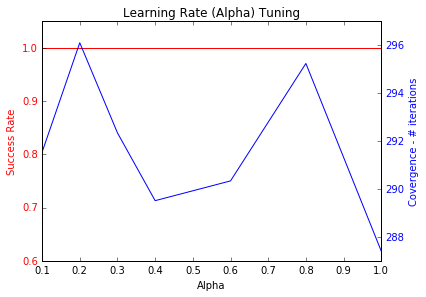

In [489]:
fig, ax1 = plt.subplots()
color = 'red'
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Success Rate', color=color)
ax1.plot(alphaList, successRate, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.ylim([0.6,1.05])
ax2 = ax1.twinx()

color = 'blue'
ax2.set_ylabel('Covergence - # iterations', color=color)  
ax2.plot(alphaList, iterations, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Learning Rate (Alpha) Tuning')
plt.show()